# Beer Foam

In [1]:
import cv2
import matplotlib.pyplot as plt

## Load, convert to grayscale, resize

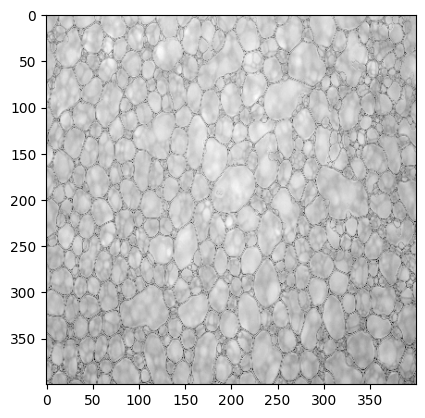

In [4]:
img = cv2.imread("beer.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (400, 400), cv2.INTER_NEAREST) # NN interpolation

plt.imshow(img, cmap="gray")

## Reduce Noise by Blurring

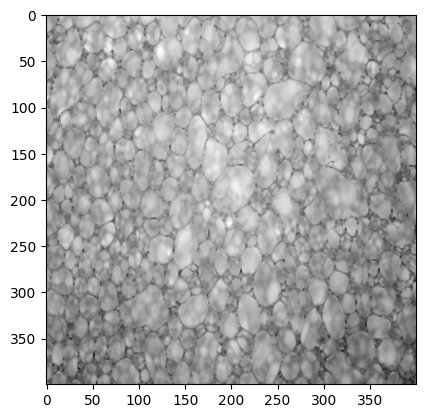

In [8]:
filtered = cv2.medianBlur(img, 3)
plt.imshow(filtered, cmap="gray")